In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Bad Fit

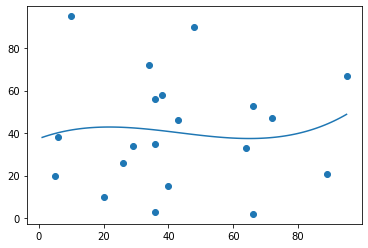

In [33]:
x = [89,43,36,36,95,10,66,34,38,20,26,29,48,64,6,5,36,66,72,40]
y = [21,46,3,35,67,95,53,72,58,10,26,34,90,33,38,20,56,2,47,15]

mymodel = np.poly1d(np.polyfit(x, y, 3))    # 3 is degree

myline = np.linspace(1, 95, 100)

plt.scatter(x, y)
plt.plot(myline, mymodel(myline))
plt.show()

In [3]:
# R-Squired Bad fit
from sklearn.metrics import r2_score

x = [89,43,36,36,95,10,66,34,38,20,26,29,48,64,6,5,36,66,72,40]
y = [21,46,3,35,67,95,53,72,58,10,26,34,90,33,38,20,56,2,47,15]

model = np.poly1d(np.polyfit(x, y, 3))

print(r2_score(y, model(x)))

0.009952707566680652


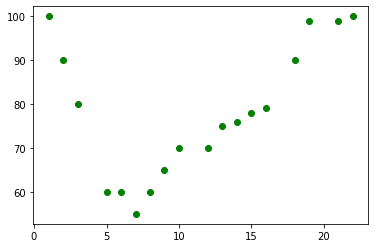

In [4]:
# Step 1: Data
x = [1,2,3,5,6,7,8,9,10,12,13,14,15,16,18,19,21,22]
y = [100,90,80,60,60,55,60,65,70,70,75,76,78,79,90,99,99,100]

plt.scatter(x, y, color='green')
plt.show()

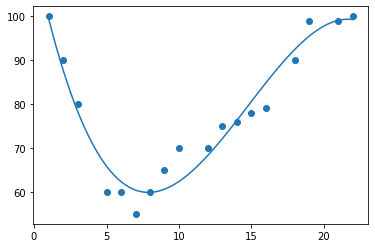

In [5]:
# Step 2: Draw the line

x = [1,2,3,5,6,7,8,9,10,12,13,14,15,16,18,19,21,22]
y = [100,90,80,60,60,55,60,65,70,70,75,76,78,79,90,99,99,100]

mymodel = np.poly1d(np.polyfit(x, y, 3))

myline = np.linspace(1, 22, 100)

plt.scatter(x, y)
plt.plot(myline, mymodel(myline))
plt.show()

In [6]:
# Step3 : Rsquared
from sklearn.metrics import r2_score

x = [1,2,3,5,6,7,8,9,10,12,13,14,15,16,18,19,21,22]
y = [100,90,80,60,60,55,60,65,70,70,75,76,78,79,90,99,99,100]

mymodel = np.poly1d(np.polyfit(x, y, 3))

print(r2_score(y, mymodel(x)))

0.9432150416451027


In [9]:
# Prediction
from sklearn.metrics import r2_score

x = [1,2,3,5,6,7,8,9,10,12,13,14,15,16,18,19,21,22]
y = [100,90,80,60,60,55,60,65,70,70,75,76,78,79,90,99,99,100]

mymodel = np.poly1d(np.polyfit(x, y, 3))

speed = mymodel(18)
print(speed)

92.48673749579979


# Hands of Example

In [12]:
import pandas as pd
dataset = pd.read_csv('https://s3.us-west-2.amazonaws.com/public.gamelab.fun/dataset/position_salaries.csv')

dataset.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [19]:
X = dataset.iloc[:, 1:2].values
y = dataset.iloc[:, 2].values

In [20]:
X

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]], dtype=int64)

In [21]:
y

array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
        300000,  500000, 1000000], dtype=int64)

In [24]:
# Splitting the dataset into Training set and Test set

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

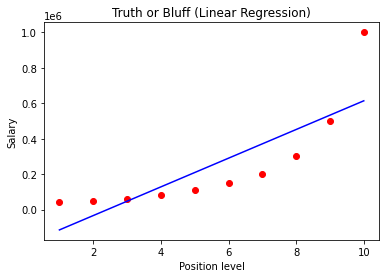

In [25]:
# Fitting Linear Regression to the dataset
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)

# Visualizing the Linear Regression results
def viz_linear():
    plt.scatter(X, y, color='red')
    plt.plot(X, lin_reg.predict(X), color='blue')
    plt.title('Truth or Bluff (Linear Regression)')
    plt.xlabel('Position level')
    plt.ylabel('Salary')
    plt.show()
    return 

viz_linear()

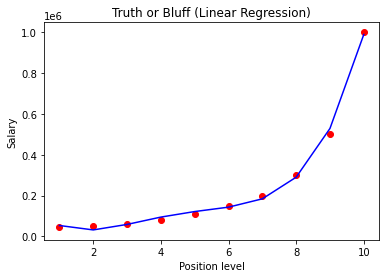

In [28]:
# Fitting Polynomial Regressionto the dataset 
from sklearn.preprocessing import PolynomialFeatures   
poly_reg = PolynomialFeatures(degree=4)
X_poly = poly_reg.fit_transform(X)                        # X ko transform krna h
pol_reg = LinearRegression()
pol_reg.fit(X_poly, y)

# Visualizing the Polynomial Regression results
def viz_polynomial():
    plt.scatter(X, y, color='red')
    plt.plot(X, pol_reg.predict(poly_reg.fit_transform(X)), color='blue')
    plt.title('Truth or Bluff (Linear Regression)')
    plt.xlabel('Position level')
    plt.ylabel('Salary')
    plt.show()
    return 

viz_polynomial()

In [29]:
# Predicting a new result with Linear Regression
pred_linear = lin_reg.predict([[11]])

In [30]:
# Predicting a new result with Polynomial Regression
pred_polynomial = pol_reg.predict(poly_reg.fit_transform([[11]]))

In [31]:
print("Linear Regression results        = ", pred_linear)
print("Polynomial Regression results    = ", pred_polynomial)

print("The difference is                = ", pred_linear - pred_polynomial)

Linear Regression results        =  [694333.33333333]
Polynomial Regression results    =  [1780833.33333322]
The difference is                =  [-1086499.99999989]
